<a href="https://colab.research.google.com/github/sabhinav3/Intro_to_ML/blob/project/XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_labels = pd.read_csv('C:/Users/sabhinav/Desktop/train_labels.csv')
train_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [ ]:
train_data = pd.read_csv('train_data.csv',nrows=1148576)
train_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [ ]:
#import pandas as pd
#import numpy as np

# Load your dataset into a DataFrame in chunks
#chunk_size = 10000  # Adjust the chunk size as needed
#selected_chunks = []

# Read the data in chunks and select 20% of each chunk
#for chunk in pd.read_csv('train_data.csv', chunksize=chunk_size):
    #random_chunk = chunk.sample(frac=0.15, random_state=66)  # Adjust random_state if needed
    #selected_chunks.append(random_chunk)

# Concatenate the selected chunks into a single DataFrame
#random_20_percent = pd.concat(selected_chunks)



In [ ]:
#random_20_percent.to_csv('train_20data.csv', index=False)

In [ ]:
# Randomly scale sample 20% of the train_labels dataset
train_labels_sample = train_labels.sample(frac=0.2, random_state=9)

# Merge the scaled data sample with train_data
train_merged = pd.merge(train_labels_sample, train_data, how='inner', on='customer_ID') # Assuming 'id' is the common column

# Save this data as a new file
train_merged.to_csv('train_sampled_1.csv', index=False)

In [ ]:
import pandas as pd
# Load the merged data
data = pd.read_csv('train_sampled_1.csv')

# Check the size of the data
print(f"Data Size: {data.shape}")

# Check the data types of the features
print(f"Data Types:\n{data.dtypes}")

# Display the first 5 rows of the data to get a snapshot
print(f"Snapshot:\n{data.head()}")

print(data.head())

Data Size: (231070, 191)
Data Types:
customer_ID     object
target           int64
S_2             object
P_2            float64
D_39           float64
                ...   
D_141          float64
D_142          float64
D_143          float64
D_144          float64
D_145          float64
Length: 191, dtype: object
Snapshot:
                                         customer_ID  target         S_2  \
0  0acf8c1279c2d9b0d6eb198ca8c9307e6f7945ff3bdf03...       1  2017-03-13   
1  0acf8c1279c2d9b0d6eb198ca8c9307e6f7945ff3bdf03...       1  2017-04-27   
2  0acf8c1279c2d9b0d6eb198ca8c9307e6f7945ff3bdf03...       1  2017-05-10   
3  0acf8c1279c2d9b0d6eb198ca8c9307e6f7945ff3bdf03...       1  2017-06-24   
4  0acf8c1279c2d9b0d6eb198ca8c9307e6f7945ff3bdf03...       1  2017-07-06   

        P_2      D_39       B_1       B_2       R_1       S_3      D_41  ...  \
0  0.335909  0.118813  0.055477  1.007289  0.003698  0.361681  0.224625  ...   
1  0.376733  0.594905  0.056213  1.004800  0.003471  0.3

In [ ]:
# Step 1: Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values Count: \n", missing_values)

# Step 2: Checking for duplicates
duplicates = data.duplicated().sum()
print("Duplicates Count: ", duplicates)

# If there are duplicates, you can drop them
if duplicates > 0:
    data = data.drop_duplicates()

Missing Values Count: 
 customer_ID         0
target              0
S_2                 0
P_2              1930
D_39                0
                ...  
D_141            4204
D_142          190391
D_143            4204
D_144            1675
D_145            4204
Length: 191, dtype: int64
Duplicates Count:  0


In [ ]:
categorical_vars = []
for column in data.columns:
    if data[column].dtype == 'object':
        categorical_vars.append(column)

# Print the categorical variables
print("Categorical Variables:")
print(categorical_vars)

Categorical Variables:
['customer_ID', 'S_2', 'D_63', 'D_64']


In [ ]:
columns_to_display = [ 'B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# Display the selected columns
selected_columns = data[columns_to_display]
print(selected_columns)

        B_30  B_38  D_114  D_116  D_117  D_120  D_126 D_63 D_64  D_66  D_68
0        0.0   3.0    0.0    0.0   -1.0    0.0    0.0   CR   -1   NaN   0.0
1        0.0   3.0    0.0    0.0   -1.0    0.0    0.0   CR   -1   NaN   0.0
2        0.0   3.0    0.0    0.0   -1.0    0.0    0.0   CR    U   NaN   2.0
3        0.0   3.0    0.0    0.0    3.0    0.0    0.0   CR    U   NaN   2.0
4        0.0   3.0    0.0    0.0    3.0    0.0    0.0   CR    U   NaN   4.0
...      ...   ...    ...    ...    ...    ...    ...  ...  ...   ...   ...
231065   1.0   4.0    0.0    0.0    3.0    1.0   -1.0   CO    U   NaN   5.0
231066   1.0   4.0    0.0    0.0   -1.0    1.0    0.0   CO  NaN   NaN   6.0
231067   1.0   4.0    0.0    0.0   -1.0    1.0    0.0   CO  NaN   NaN   6.0
231068   1.0   4.0    0.0    0.0   -1.0    1.0    0.0   CO  NaN   NaN   6.0
231069   1.0   4.0    0.0    0.0   -1.0    1.0    0.0   CO  NaN   NaN   5.0

[231070 rows x 11 columns]


In [ ]:
columns_to_encode = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
encoded_data = pd.get_dummies(data, columns=columns_to_encode)

In [ ]:
encoded_data.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,0acf8c1279c2d9b0d6eb198ca8c9307e6f7945ff3bdf03...,1,2017-03-13,0.335909,0.118813,0.055477,1.007289,0.003698,0.361681,0.224625,...,0,0,0,1,0,0,0,0,0,0
1,0acf8c1279c2d9b0d6eb198ca8c9307e6f7945ff3bdf03...,1,2017-04-27,0.376733,0.594905,0.056213,1.004800,0.003471,0.377507,0.123821,...,0,0,0,1,0,0,0,0,0,0
2,0acf8c1279c2d9b0d6eb198ca8c9307e6f7945ff3bdf03...,1,2017-05-10,0.376699,0.912841,0.060606,0.237213,0.502400,0.370410,0.371757,...,1,0,0,0,0,1,0,0,0,0
3,0acf8c1279c2d9b0d6eb198ca8c9307e6f7945ff3bdf03...,1,2017-06-24,0.294122,0.004235,0.002723,0.000669,0.506663,0.314406,0.693045,...,1,0,0,0,0,1,0,0,0,0
4,0acf8c1279c2d9b0d6eb198ca8c9307e6f7945ff3bdf03...,1,2017-07-06,0.294152,0.006341,0.014884,0.006331,0.509375,0.321234,0.700914,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
encoded_data.dtypes

customer_ID     object
target           int64
S_2             object
P_2            float64
D_39           float64
                ...   
D_68_2.0         uint8
D_68_3.0         uint8
D_68_4.0         uint8
D_68_5.0         uint8
D_68_6.0         uint8
Length: 225, dtype: object

In [ ]:
# Assuming you have already one-hot encoded your DataFrame and it's stored in 'encoded_data'
# Convert one-hot encoded columns to boolean (True/False)
print(encoded_data[encoded_data.columns[encoded_data.columns.str.startswith(tuple(columns_to_encode))]].head())

   B_30_0.0  B_30_1.0  B_30_2.0  B_38_1.0  B_38_2.0  B_38_3.0  B_38_4.0  \
0         1         0         0         0         0         1         0   
1         1         0         0         0         0         1         0   
2         1         0         0         0         0         1         0   
3         1         0         0         0         0         1         0   
4         1         0         0         0         0         1         0   

   B_38_5.0  B_38_6.0  B_38_7.0  ...  D_64_U  D_66_0.0  D_66_1.0  D_68_0.0  \
0         0         0         0  ...       0         0         0         1   
1         0         0         0  ...       0         0         0         1   
2         0         0         0  ...       1         0         0         0   
3         0         0         0  ...       1         0         0         0   
4         0         0         0  ...       1         0         0         0   

   D_68_1.0  D_68_2.0  D_68_3.0  D_68_4.0  D_68_5.0  D_68_6.0  
0         0     

In [ ]:
# Assuming you have a DataFrame named 'encoded_data' with boolean columns
# Get the unique values of boolean columns
unique_values = encoded_data.apply(lambda col: col.unique())

# Print the unique values
print(unique_values)


customer_ID    [0acf8c1279c2d9b0d6eb198ca8c9307e6f7945ff3bdf0...
target                                                    [1, 0]
S_2            [2017-03-13, 2017-04-27, 2017-05-10, 2017-06-2...
P_2            [0.3359087839025422, 0.376732514409366, 0.3766...
D_39           [0.1188130262408221, 0.5949052038425099, 0.912...
                                     ...                        
D_68_2.0                                                  [0, 1]
D_68_3.0                                                  [0, 1]
D_68_4.0                                                  [0, 1]
D_68_5.0                                                  [0, 1]
D_68_6.0                                                  [0, 1]
Length: 225, dtype: object


In [ ]:
numeric_columns = encoded_data.select_dtypes(include=np.float64).columns.tolist()
avg_data = encoded_data.groupby('customer_ID')[numeric_columns].mean()
avg_data

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,NaN,0.144571,...,NaN,NaN,NaN,0.004906,0.006271,0.006007,NaN,0.004824,0.004218,0.004902
00013c6e1cec7c21bede7cb319f1e28eb994f5625257f479c53ad6e90c177f7c,0.246515,0.226813,0.101118,0.122783,0.503692,0.452528,0.160821,0.216182,0.280145,0.099967,...,NaN,NaN,NaN,0.006283,0.004446,0.005433,NaN,0.005833,0.005426,0.005028
0001812036f1558332e5c0880ecbad70b13a6f28ab04a8db6d83a26ef40aadb0,0.386107,0.117855,0.862294,0.023567,0.274521,0.820201,0.005433,0.749541,NaN,0.387932,...,NaN,NaN,NaN,0.004814,0.004245,0.005814,NaN,0.004942,0.004461,0.003548
00031e8be98bc3411f6037cbd4d3eeaf24b3ae221682b77900533c9bb36ec41f,0.721835,0.195796,0.025548,1.004939,0.004133,0.162692,0.005479,0.009975,NaN,0.180038,...,NaN,NaN,NaN,1.004746,0.004145,0.888561,0.136714,1.003390,0.466422,0.095089
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,0.947334,0.150307,0.038504,0.695515,0.005094,0.384485,0.004443,0.033759,NaN,0.132122,...,NaN,NaN,NaN,0.004950,0.004052,0.004836,NaN,0.004090,0.004734,0.003945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3502ee2dea5e26e4f6f6fd9afed07afa6a8481d9b2f500a458dd436a2885fc79,0.934709,0.043371,0.021566,0.888350,0.005078,0.198017,0.004232,0.012748,NaN,0.019564,...,NaN,NaN,NaN,0.003719,0.003958,0.004002,NaN,0.004751,0.006330,0.004315
3507a1288c81ea373f84764618171666330059b8206b9f3cdaf6c500b3755427,0.858995,0.335572,0.109548,0.313114,0.051620,0.146171,0.005348,0.162217,NaN,0.034464,...,NaN,NaN,NaN,0.005342,0.005643,0.003525,NaN,0.004003,0.006346,0.003569
3507f9575f5dff20dc21b2ab4becff0087d152d9b119878bc6d6663d766c728a,0.784792,0.005346,0.005749,0.814565,0.005764,NaN,0.004164,0.004514,NaN,NaN,...,NaN,NaN,NaN,0.004094,0.004757,0.005637,NaN,0.005148,0.004265,0.004093


In [ ]:
int_col = encoded_data.select_dtypes(include=np.int64).columns.tolist()
avg_int_data = encoded_data.groupby('customer_ID')[int_col].mean()
avg_int_data

,target,B_31
customer_ID,,
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.0,1.0
00013c6e1cec7c21bede7cb319f1e28eb994f5625257f479c53ad6e90c177f7c,1.0,1.0
0001812036f1558332e5c0880ecbad70b13a6f28ab04a8db6d83a26ef40aadb0,1.0,1.0
00031e8be98bc3411f6037cbd4d3eeaf24b3ae221682b77900533c9bb36ec41f,0.0,1.0
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,0.0,1.0
...,...,...
3502ee2dea5e26e4f6f6fd9afed07afa6a8481d9b2f500a458dd436a2885fc79,0.0,1.0
3507a1288c81ea373f84764618171666330059b8206b9f3cdaf6c500b3755427,0.0,1.0
3507f9575f5dff20dc21b2ab4becff0087d152d9b119878bc6d6663d766c728a,0.0,1.0


In [ ]:
bin_col = encoded_data.select_dtypes(include=np.uint8).columns.tolist()
avg_bin_data = encoded_data.groupby('customer_ID')[bin_col].mean()
avg_bin_data

,B_30_0.0,B_30_1.0,B_30_2.0,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,B_38_7.0,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
00013c6e1cec7c21bede7cb319f1e28eb994f5625257f479c53ad6e90c177f7c,0.538462,0.461538,0.0,0.0,0.000000,0.000000,0.769231,0.230769,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.461538,0.538462,0.000000,0.0
0001812036f1558332e5c0880ecbad70b13a6f28ab04a8db6d83a26ef40aadb0,0.000000,1.000000,0.0,0.0,0.000000,0.076923,0.307692,0.538462,0.076923,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.000000,0.769231,0.230769,0.000000,0.0
00031e8be98bc3411f6037cbd4d3eeaf24b3ae221682b77900533c9bb36ec41f,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.076923,0.0,0.0,0.0,0.0,0.076923,0.000000,0.923077,0.000000,0.0
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,1.000000,0.000000,0.0,0.0,0.153846,0.846154,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3502ee2dea5e26e4f6f6fd9afed07afa6a8481d9b2f500a458dd436a2885fc79,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
3507a1288c81ea373f84764618171666330059b8206b9f3cdaf6c500b3755427,1.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0
3507f9575f5dff20dc21b2ab4becff0087d152d9b119878bc6d6663d766c728a,1.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0


In [ ]:
merge_data = pd.merge(avg_bin_data, avg_int_data, on='customer_ID')

new_data1 = pd.merge(merge_data, avg_data, on='customer_ID')

new_data1.head()

,B_30_0.0,B_30_1.0,B_30_2.0,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,B_38_7.0,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,NaN,NaN,NaN,0.004906,0.006271,0.006007,NaN,0.004824,0.004218,0.004902
00013c6e1cec7c21bede7cb319f1e28eb994f5625257f479c53ad6e90c177f7c,0.538462,0.461538,0.0,0.0,0.000000,0.000000,0.769231,0.230769,0.000000,0.0,...,NaN,NaN,NaN,0.006283,0.004446,0.005433,NaN,0.005833,0.005426,0.005028
0001812036f1558332e5c0880ecbad70b13a6f28ab04a8db6d83a26ef40aadb0,0.000000,1.000000,0.0,0.0,0.000000,0.076923,0.307692,0.538462,0.076923,0.0,...,NaN,NaN,NaN,0.004814,0.004245,0.005814,NaN,0.004942,0.004461,0.003548
00031e8be98bc3411f6037cbd4d3eeaf24b3ae221682b77900533c9bb36ec41f,1.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,NaN,NaN,NaN,1.004746,0.004145,0.888561,0.136714,1.003390,0.466422,0.095089
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,1.000000,0.000000,0.0,0.0,0.153846,0.846154,0.000000,0.000000,0.000000,0.0,...,NaN,NaN,NaN,0.004950,0.004052,0.004836,NaN,0.004090,0.004734,0.003945


In [ ]:
new_data1.to_csv('new_data.csv', index=False)

In [ ]:
new_data = pd.read_csv('new_data.csv')
print(new_data.head())

   B_30_0.0  B_30_1.0  B_30_2.0  B_38_1.0  B_38_2.0  B_38_3.0  B_38_4.0  \
0  1.000000  0.000000       0.0       0.0  1.000000  0.000000  0.000000   
1  0.538462  0.461538       0.0       0.0  0.000000  0.000000  0.769231   
2  0.000000  1.000000       0.0       0.0  0.000000  0.076923  0.307692   
3  1.000000  0.000000       0.0       0.0  1.000000  0.000000  0.000000   
4  1.000000  0.000000       0.0       0.0  0.153846  0.846154  0.000000   

   B_38_5.0  B_38_6.0  B_38_7.0  ...  D_136  D_137  D_138     D_139     D_140  \
0  0.000000  0.000000       0.0  ...    NaN    NaN    NaN  0.004906  0.006271   
1  0.230769  0.000000       0.0  ...    NaN    NaN    NaN  0.006283  0.004446   
2  0.538462  0.076923       0.0  ...    NaN    NaN    NaN  0.004814  0.004245   
3  0.000000  0.000000       0.0  ...    NaN    NaN    NaN  1.004746  0.004145   
4  0.000000  0.000000       0.0  ...    NaN    NaN    NaN  0.004950  0.004052   

      D_141     D_142     D_143     D_144     D_145  
0  0.006

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test1, Y_train, Y_test1 = train_test_split(new_data1.drop('target', axis=1), new_data1['target'], test_size=0.3, random_state=45)
X_test1, X_test2, Y_test1, Y_test2 = train_test_split(X_test1,Y_test1, test_size=0.5, random_state=45)

In [ ]:
X_train.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)
X_test1.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)
X_test2.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)

In [ ]:
X_train.shape

(13407, 222)

In [ ]:
# check - it is a good practice to compare test and train samples to make sure they are not fundamentally different.
# If so, we will get high variance even with a non-overfitted model.
# Here we compare bad rate in both samples.
print (sum(Y_train)/len(Y_train))
print (sum(Y_test1)/len(Y_test1))
print (sum(Y_test2)/len(Y_test2))

0.25427015738047287
0.27184128089105464
0.2450400278454577


In [ ]:
print("X_test1 shape: ", X_test1.shape)
print("Y_test1 shape: ", Y_test1.shape)

X_test1 shape:  (2873, 222)
Y_test1 shape:  (2873,)


# XGBOOST

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb

In [ ]:
xgb_instance = xgb.XGBClassifier()

In [ ]:
xgb_instance = xgb.XGBClassifier() # nothing inside paranthesis, meaning we are using default parameters, with 100 trees.

model_for_feature_selection = xgb_instance.fit(X_train,Y_train)
model_for_feature_selection


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
feature_importance = {'Feature':X_train.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
feature_importance

,Feature,Importance
46,P_2,0.246582
48,B_1,0.073511
50,R_1,0.022745
185,D_110,0.014016
77,B_11,0.012037
...,...,...
38,D_68_0.0,0.000000
39,D_68_1.0,0.000000
150,D_88,0.000000
114,D_73,0.000000


In [ ]:
final_features = feature_importance["Feature"][feature_importance.Importance > 0.005]

X1_train = X_train[final_features]
X1_test1 = X_test1[final_features]
X1_test2 = X_test2[final_features]
final_features

46          P_2
48          B_1
50          R_1
185       D_110
77         B_11
49          B_2
54         D_42
108        B_22
0      B_30_0.0
66          B_7
99         B_17
73          P_3
207       D_132
56         D_44
187        B_39
83          S_8
64         D_49
59          B_5
61         D_46
63         D_48
182        R_27
51          S_3
85         D_56
171        S_25
52         D_41
88         D_58
112        S_15
58         D_45
68         D_50
Name: Feature, dtype: object

In [ ]:
model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
##feature_importance = model.feature_importances_

s_feature_importance = {'Feature':X_train.columns,'Importance':model.feature_importances_}
s_feature_importance = pd.DataFrame(s_feature_importance)
s_feature_importance.sort_values("Importance", inplace=True,ascending=False)
s_feature_importance

,Feature,Importance
46,P_2,0.100553
63,D_48,0.040157
48,B_1,0.025474
49,B_2,0.019221
70,B_9,0.018188
...,...,...
32,D_64_-1,0.000324
27,D_63_CO,0.000000
36,D_66_0.0,0.000000
38,D_68_0.0,0.000000


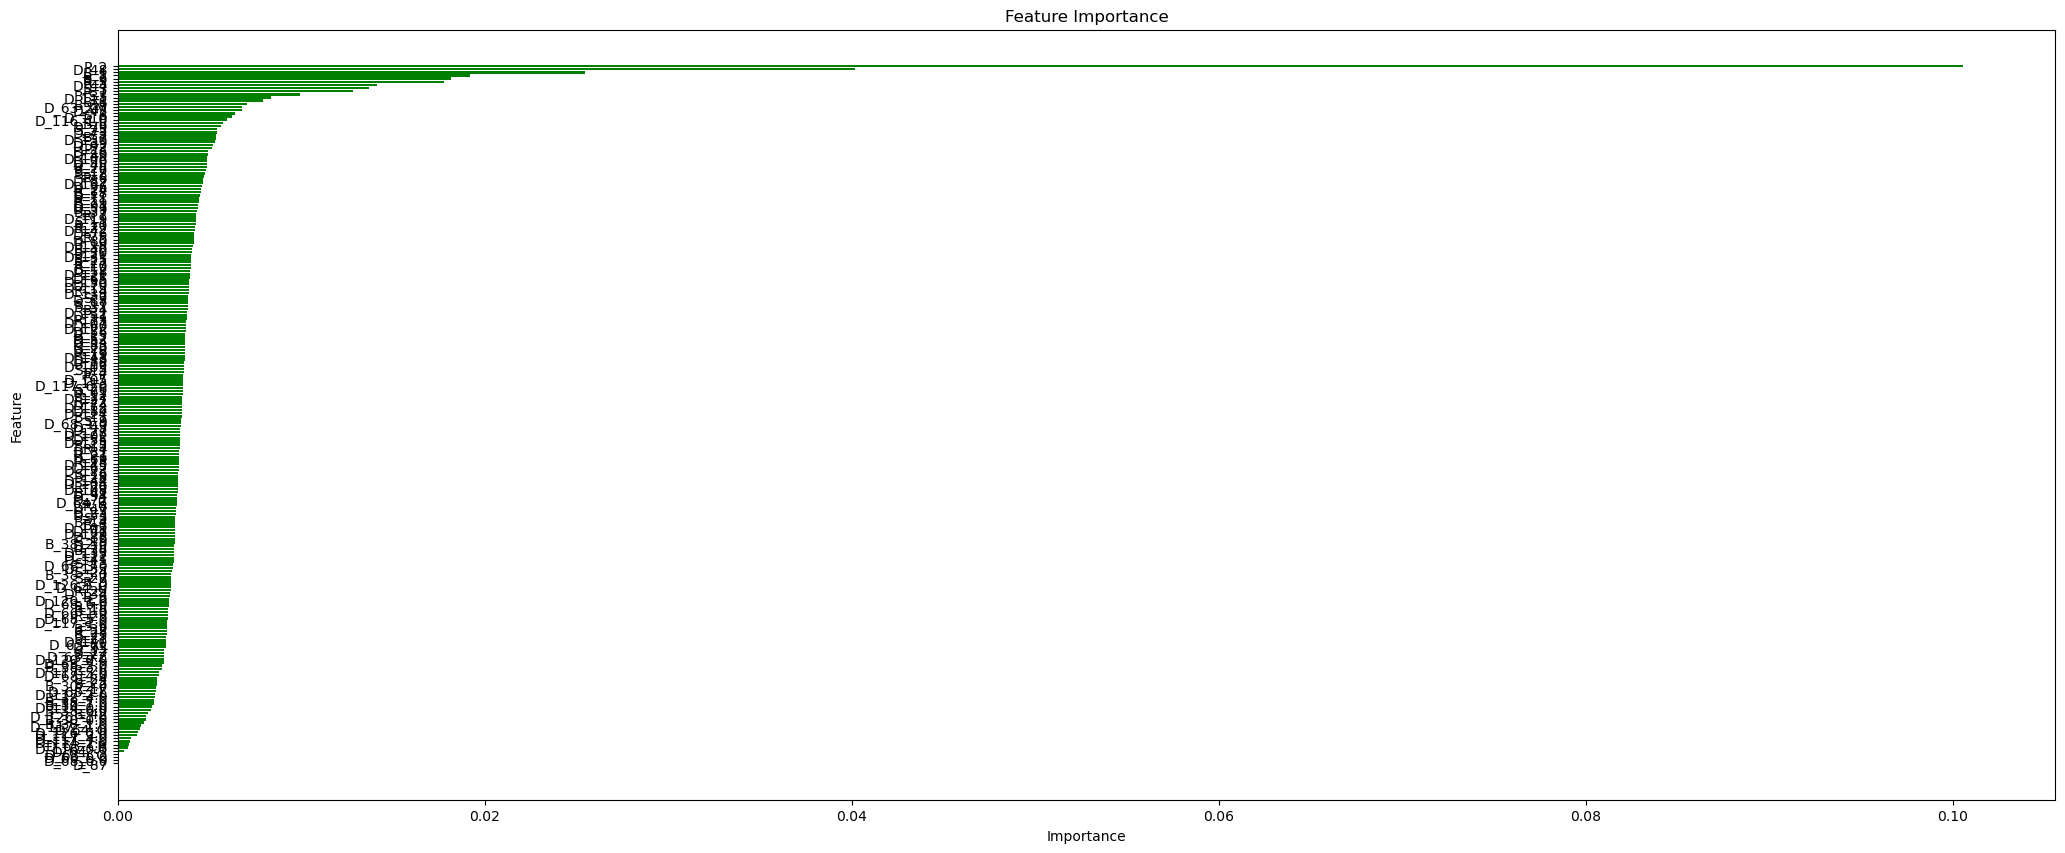

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have s_feature_importance DataFrame
plt.figure(figsize=(25,10))
plt.barh(s_feature_importance['Feature'], s_feature_importance['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()


In [ ]:
# choose featires with FI higher than 0.5%

final_features_1 = s_feature_importance["Feature"][s_feature_importance.Importance > 0.005]

X2_train = X_train[final_features_1]
X2_test1 = X_test1[final_features_1]
X2_test2 = X_test2[final_features_1]
final_features_1


46           P_2
63          D_48
48           B_1
49           B_2
70           B_9
71           R_3
56          D_44
51           S_3
50           R_1
157         B_33
186        D_111
67           B_8
187         B_39
30       D_63_XM
54          D_42
83           S_8
185        D_110
13     D_116_1.0
59           B_5
125         D_79
171         S_25
114         D_73
66           B_7
215        D_139
47          D_39
162         D_92
73           P_3
Name: Feature, dtype: object

In [ ]:
merged_feature_importance = pd.concat([feature_importance, s_feature_importance], ignore_index=True)

# Group by 'Feature' and calculate the maximum importance across both models
max_importance = merged_feature_importance.groupby('Feature')['Importance'].max().reset_index()

# Filter features that have importance greater than 0.5% in either of the two models
filtered_features = max_importance[max_importance['Importance'] > 0.005]['Feature']

X3_train = X_train[filtered_features]
X3_test1 = X_test1[filtered_features]
X3_test2 = X_test2[filtered_features]

In [ ]:
filtered_features

0            B_1
2           B_11
8           B_17
11           B_2
14          B_22
23      B_30_0.0
28          B_33
38          B_39
43           B_5
45           B_7
46           B_8
47           B_9
56         D_110
57         D_111
64     D_116_1.0
89         D_132
96         D_139
103         D_39
104         D_41
105         D_42
107         D_44
108         D_45
109         D_46
111         D_48
112         D_49
113         D_50
119         D_56
120         D_58
129      D_63_XM
149         D_73
155         D_79
166         D_92
170          P_2
171          P_3
173          R_1
192         R_27
194          R_3
204         S_15
213         S_25
216          S_3
220          S_8
Name: Feature, dtype: object

In [ ]:
from sklearn.metrics import roc_auc_score
table = pd.DataFrame(columns = ["Num Trees", "Learning Rate","subsample","colsample_bytree","scale_pos_weight", "AUC Train", "AUC Test1","AUC Test2"])

row = 0
for num_trees in [50, 100, 300]:
  for LR in [0.01, 0.1]:
    for subsample in [0.5,0.8]:
        for colsample_bytree in [0.5,1.0]:
            for scale_pos_weight in [1,5,10]:
               xgb_instance = xgb.XGBClassifier(n_estimators=num_trees, learning_rate = LR,subsample=subsample,colsample_bytree=colsample_bytree,scale_pos_weight=scale_pos_weight)
               model = xgb_instance.fit(X3_train, Y_train)

               table.loc[row,"Num Trees"] = num_trees
               table.loc[row,"Learning Rate"] = LR
               table.loc[row,"subsample"] = subsample
               table.loc[row,"colsample_bytree"] = colsample_bytree
               table.loc[row,"scale_pos_weight"] = scale_pos_weight
               table.loc[row,"AUC Train"] = roc_auc_score(Y_train, model.predict_proba(X3_train)[:,1])
               table.loc[row,"AUC Test1"] = roc_auc_score(Y_test1, model.predict_proba(X3_test1)[:,1])
               table.loc[row,"AUC Test2"] = roc_auc_score(Y_test2, model.predict_proba(X3_test2)[:,1])



               row = row + 1

table

,Num Trees,Learning Rate,subsample,colsample_bytree,scale_pos_weight,AUC Train,AUC Test1,AUC Test2
0,50,0.01,0.5,0.5,1,0.957924,0.935877,0.936687
1,50,0.01,0.5,0.5,5,0.955533,0.933927,0.935008
2,50,0.01,0.5,0.5,10,0.953394,0.93122,0.933021
3,50,0.01,0.5,1.0,1,0.957149,0.93465,0.934158
4,50,0.01,0.5,1.0,5,0.953044,0.931431,0.932287
...,...,...,...,...,...,...,...,...
67,300,0.1,0.8,0.5,5,0.999992,0.937952,0.939332
68,300,0.1,0.8,0.5,10,0.999937,0.938512,0.937326
69,300,0.1,0.8,1.0,1,0.999995,0.938471,0.940326
70,300,0.1,0.8,1.0,5,0.999998,0.938068,0.938629


In [ ]:
# Define the thresholds
train_threshold = 0.85
difference_threshold = 0.05

# Initialize the best_auc as 0
best_auc = 0
# Initialize the best model as None
best_model = None

# Loop through each row in the dataframe
for index, row in table.iterrows():
    # Calculate the maximum difference between train AUC and test AUCs
    max_difference = max(abs(row['AUC Train'] - row['AUC Test1']), abs(row['AUC Train'] - row['AUC Test2']))

    # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
    if row['AUC Train'] > train_threshold and max_difference < difference_threshold:
        # Check if this model has a higher average AUC score on the test sets than the current best model
        average_test_auc = (row['AUC Test1'] + row['AUC Test2']) / 2
        if average_test_auc > best_auc:
            # Update the best_auc and best_model
            best_auc = average_test_auc
            best_model = row

# Print the parameters of the best model
if best_model is not None:
    print(best_model)
else:
    print("No model found that satisfies the given conditions.")


Num Trees                100
Learning Rate            0.1
subsample                0.8
colsample_bytree         0.5
scale_pos_weight           1
AUC Train           0.990169
AUC Test1           0.940463
AUC Test2             0.9409
Name: 42, dtype: object


In [ ]:
best_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0, scale_pos_weight=1)

# Fit the model on the training data
best_model = best_xgb.fit(X3_train, Y_train)

In [ ]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
Y_train

customer_ID
273bb5aaf36f4fbdb02b9359ab8345eaa07a95ea9abfea6cb08a0a3f4da53188    0.0
347da40e16816469352513f5fee614875a34392a749a1a1b975556a951dbe5fc    1.0
2bfb1acc29bf8f68e7f788b939e903499e1669095ff697713731f277b3991a59    1.0
2bbb95cbbc5c8e05892024f4fdb0a2299163adb32bd86765c3cf43b62c34971b    0.0
2b38fd295af0b6575774f2f8801ba5ef0e0b28e0ef9a65f4485c2a13f2cb96cc    1.0
                                                                   ... 
2dd63abdb32954be188641d93e4d051d14359c275f34af14909b34b7860d5ced    0.0
2d1d1cee47b9f73fc4684cc1f19d3b1d4bbc578cd8002a031560caabd6af9d8b    0.0
23c90d0c29658765f56212bcef99c0ed16ef44183b012691c2676a2d4d7fc3ec    0.0
10b34e16c6554848ebdc8b8c1c046745a32b39acb8050fe40e2d2279c6fe5c1e    0.0
122b14c11d96f39b4f7a3837ca6f7ba0e1a5bad224f2b1a613e8fd3d949ec58e    0.0
Name: target, Length: 13407, dtype: float64

In [ ]:
perf_train_data = pd.DataFrame({"Actual": Y_train, "Prediction": best_model.predict_proba(X3_train)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)

perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00179]",0.0,1341,0.000000
"(0.00179, 0.00292]",0.0,1341,0.000000
"(0.00292, 0.00495]",0.0,1340,0.000000
"(0.00495, 0.00994]",0.0,1341,0.000000
"(0.00994, 0.0272]",1.0,1341,0.000746
"(0.0272, 0.0952]",15.0,1340,0.011194
"(0.0952, 0.311]",86.0,1341,0.064131
"(0.311, 0.695]",669.0,1340,0.499254
"(0.695, 0.902]",1297.0,1341,0.967189


In [ ]:
stat = stat.reset_index()

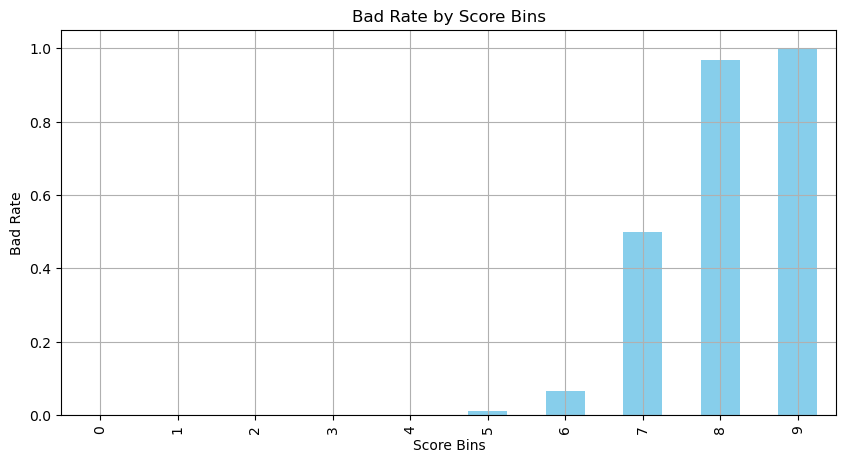

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 5))
stat['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()


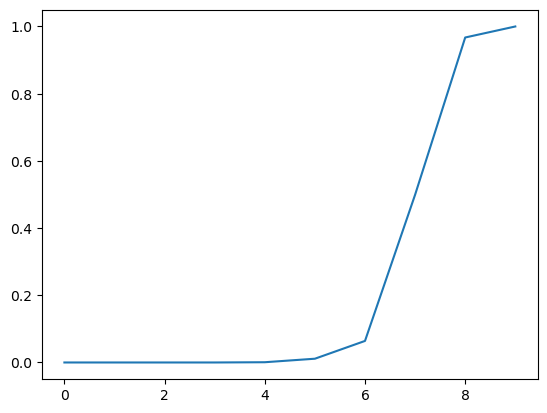

In [ ]:


plt.plot(stat["Bad Rate"])

In [ ]:
perf_test_data = pd.DataFrame({"Actual": Y_test1, "Prediction": best_model.predict_proba(X3_test1)[:,1]})

perf_test_data["Score Bins"] = pd.cut(perf_test_data["Prediction"], quantiles)
stat = perf_test_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00179]",0.0,281,0.000000
"(0.00179, 0.00292]",0.0,268,0.000000
"(0.00292, 0.00495]",2.0,270,0.007407
"(0.00495, 0.00994]",2.0,283,0.007067
"(0.00994, 0.0272]",5.0,284,0.017606
"(0.0272, 0.0952]",25.0,250,0.100000
"(0.0952, 0.311]",65.0,282,0.230496
"(0.311, 0.695]",233.0,411,0.566910
"(0.695, 0.902]",224.0,297,0.754209


In [ ]:
perf_test_data = pd.DataFrame({"Actual": Y_test2, "Prediction": best_model.predict_proba(X3_test2)[:,1]})

perf_test_data["Score Bins"] = pd.cut(perf_test_data["Prediction"], quantiles)
stat = perf_test_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00179]",0.0,304,0.000000
"(0.00179, 0.00292]",1.0,278,0.003597
"(0.00292, 0.00495]",3.0,280,0.010714
"(0.00495, 0.00994]",4.0,309,0.012945
"(0.00994, 0.0272]",7.0,323,0.021672
"(0.0272, 0.0952]",23.0,269,0.085502
"(0.0952, 0.311]",72.0,271,0.265683
"(0.311, 0.695]",185.0,352,0.525568
"(0.695, 0.902]",194.0,250,0.776000


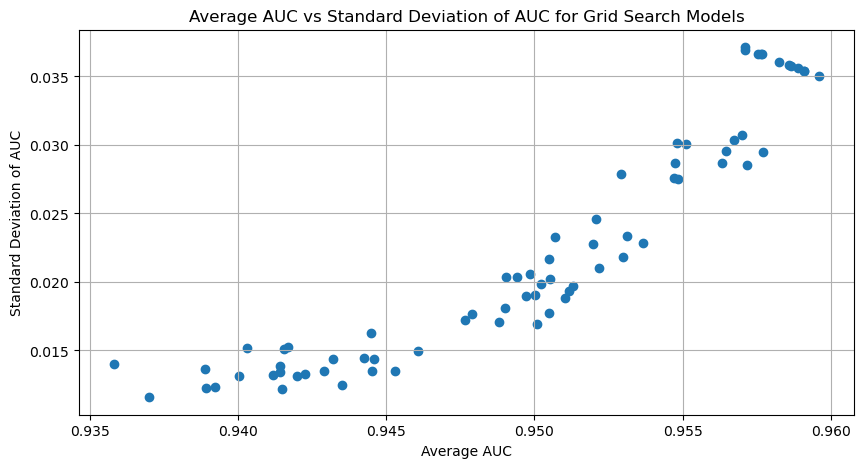

In [ ]:
# Calculate average and standard deviation of AUCs
table['Average AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].mean(axis=1)
table['Standard Deviation AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].std(axis=1)

# Create scatter plot (Average AUC vs Standard Deviation of AUC)
plt.figure(figsize=(10, 5))
plt.scatter(table['Average AUC'], table['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()

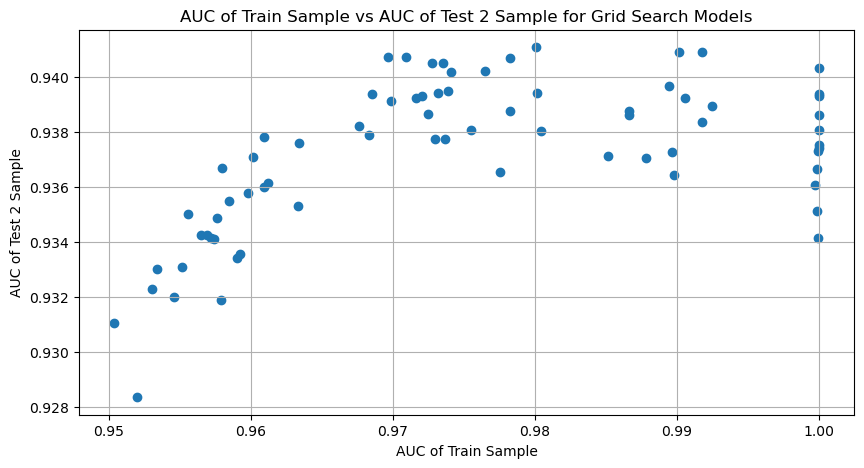

In [ ]:
# Create scatter plot (AUC of train sample vs AUC of Test 2 sample)
plt.figure(figsize=(10, 5))
plt.scatter(table['AUC Train'], table['AUC Test2'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 2 Sample for Grid Search Models')
plt.grid(True)
plt.show()

In [ ]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
explainer = shap.Explainer(best_model)
shap_values = explainer(X3_test2)


[16:48:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


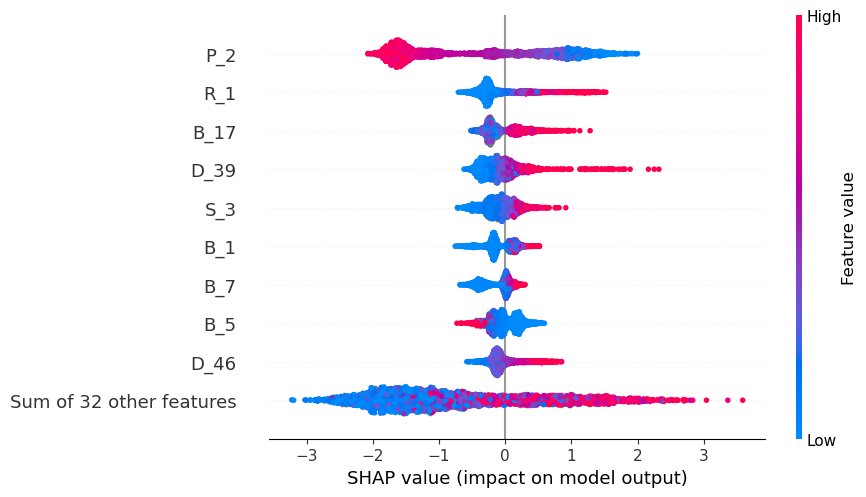

In [ ]:
shap.plots.beeswarm(shap_values)

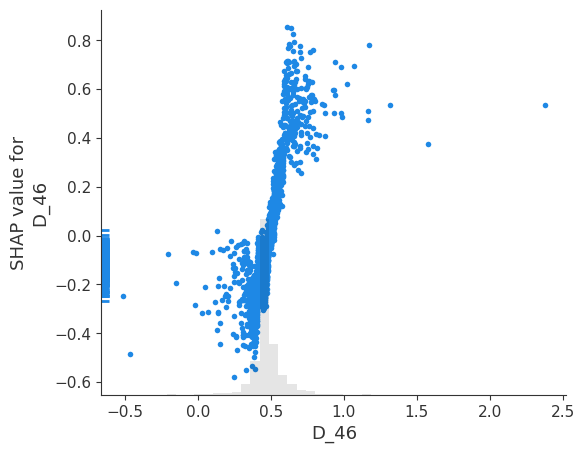

In [ ]:
shap.plots.scatter(shap_values[:,"D_46"])

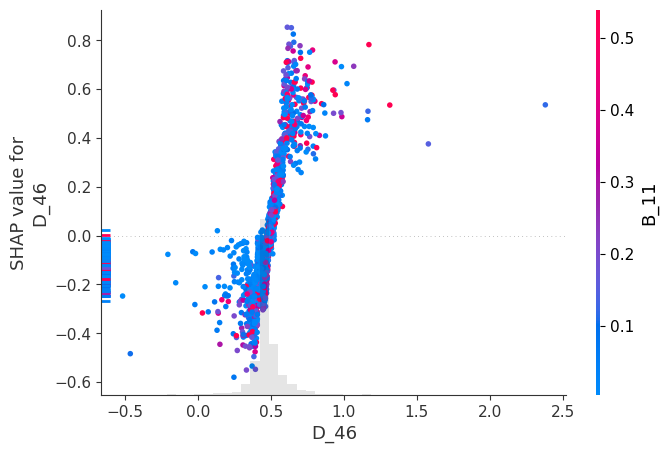

In [ ]:
shap.plots.scatter(shap_values[:,"D_46"], color=shap_values[:,"B_11"])

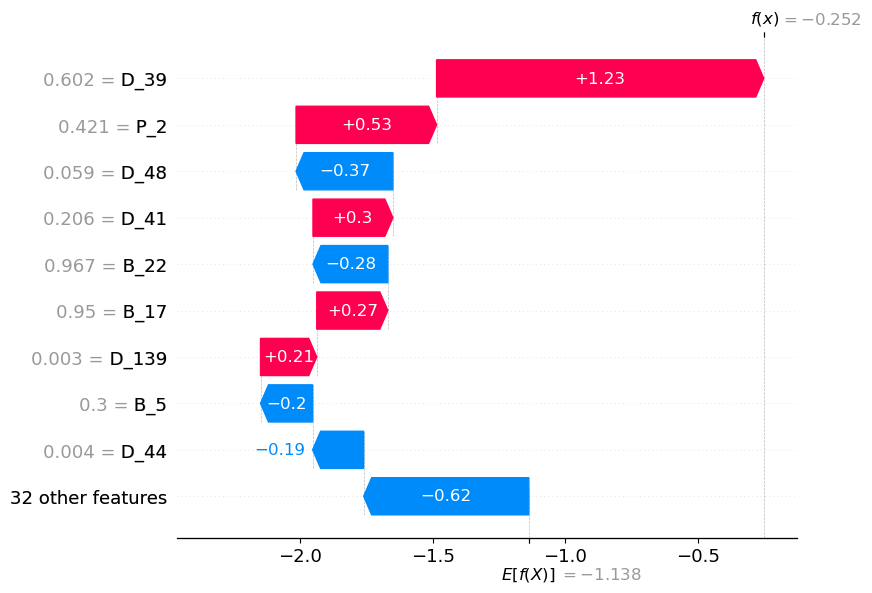

In [ ]:
shap.plots.waterfall(shap_values[1100])

In [ ]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target'])



# Subsetting X3_test1 with the columns of X3_train
X3_test1 = X3_test1[X3_train.columns]



# Predict default probabilities on the test set
predicted_default = best_model.predict_proba(X3_test1)[:, 1]



# Add predicted default probabilities and actual target to the test dataframe
X3_test1['predicted_default'] = predicted_default
X3_test1 = X3_test1.assign(target = Y_test1.values)



# Define the function that calculates default rate and expected revenue
def calculate_metrics(df, threshold):
    accepted_customers = df[df["predicted_default"] < threshold].copy()

    # Calculate portfolio default rate
    portfolio_default_rate = accepted_customers['target'].mean()



    # Calculate portfolio expected revenue
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_2"]*0.02 + accepted_customers["S_3"]*0.001
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()

    return portfolio_default_rate, portfolio_expected_revenue



# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    default_rate, expected_revenue = calculate_metrics(X3_test1, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

Threshold: 0.1, Default Rate: 0.02130249543517955, Expected Revenue: 260.5513360550544
Threshold: 0.2, Default Rate: 0.032832498608792435, Expected Revenue: 273.7476268410585
Threshold: 0.3, Default Rate: 0.049868766404199474, Expected Revenue: 280.66179207755346
Threshold: 0.4, Default Rate: 0.07061163600198907, Expected Revenue: 286.37571253744113
Threshold: 0.5, Default Rate: 0.09065021357380161, Expected Revenue: 290.8704973420412


In [ ]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target'])



# Subsetting X3_test1 with the columns of X3_train
X3_test2 = X3_test2[X3_train.columns]



# Predict default probabilities on the test set
predicted_default = best_model.predict_proba(X3_test2)[:, 1]



# Add predicted default probabilities and actual target to the test dataframe
X3_test2['predicted_default'] = predicted_default
X3_test2 = X3_test2.assign(target = Y_test2.values)



# Define the function that calculates default rate and expected revenue
def calculate_metrics(df, threshold):
    accepted_customers = df[df["predicted_default"] < threshold].copy()

    # Calculate portfolio default rate
    portfolio_default_rate = accepted_customers['target'].mean()



    # Calculate portfolio expected revenue
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_2"]*0.02 + accepted_customers["S_3"]*0.001
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()

    return portfolio_default_rate, portfolio_expected_revenue



# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    default_rate, expected_revenue = calculate_metrics(X3_test2, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

Threshold: 0.1, Default Rate: 0.022560631697687534, Expected Revenue: 278.28076266459817
Threshold: 0.2, Default Rate: 0.03653444676409186, Expected Revenue: 289.05526464612973
Threshold: 0.3, Default Rate: 0.05231984205330701, Expected Revenue: 295.8200488411502
Threshold: 0.4, Default Rate: 0.06597057427622212, Expected Revenue: 299.57723218406954
Threshold: 0.5, Default Rate: 0.08480725623582766, Expected Revenue: 304.03866387850735


In [ ]:

X3_test2 = X3_test2[filtered_features]


# Generate predicted probabilities

default_predicted = best_model.predict_proba(X3_test2)[:, 1]

In [ ]:




X3_test2['predicted_default'] = predicted_default




may17_jan18 = encoded_data[(encoded_data['S_2'] >= '2017-05-01') & (encoded_data['S_2'] <= '2018-01-31')]

mar17_apr17 = encoded_data[(encoded_data['S_2'] >= '2017-03-01') & (encoded_data['S_2'] <= '2017-04-30')]

feb18_apr18 = encoded_data[(encoded_data['S_2'] >= '2018-02-01') & (encoded_data['S_2'] <= '2018-04-30')]



may17_jan18["predicted_default"] = best_model.predict_proba(may17_jan18[filtered_features])[:, 1]

mar17_apr17["predicted_default"] = best_model.predict_proba(mar17_apr17[filtered_features])[:, 1]

feb18_apr18["predicted_default"] = best_model.predict_proba(feb18_apr18[filtered_features])[:, 1]



for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:

    print(f"Threshold: {threshold}")

    default_rate, expected_revenue = calculate_metrics(may17_jan18, threshold)

    print(f"May 2017 - Jan 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")



    default_rate, expected_revenue = calculate_metrics(mar17_apr17, threshold)

    print(f"March 2017 - April 2017, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")



    default_rate, expected_revenue = calculate_metrics(feb18_apr18, threshold)

    print(f"February 2018 - March 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Threshold: 0.1
May 2017 - Jan 2018, Default Rate: 0.02888273042433694, Expected Revenue: 14161.844415766831
March 2017 - April 2017, Default Rate: 0.039265877807292925, Expected Revenue: 3091.8232738774705
February 2018 - March 2018, Default Rate: 0.016776075857038657, Expected Revenue: 3291.862723469021
Threshold: 0.2
May 2017 - Jan 2018, Default Rate: 0.04919491485313467, Expected Revenue: 15042.331234512993
March 2017 - April 2017, Default Rate: 0.06358707438733463, Expected Revenue: 3269.749641961034
February 2018 - March 2018, Default Rate: 0.030980359930972142, Expected Revenue: 3493.2198548875485
Threshold: 0.3
May 2017 - Jan 2018, Default Rate: 0.06798836714427578, Expected Revenue: 15460.3175435764
March 2017 - April 2017, Default Rate: 0.08498744227497367, Expected Revenue: 3354.964868060966
February 2018 - March 2018, Default Rate: 0.04515082461086864, Expected Revenue: 3590.7781343196953
Threshold: 0.4
May 2017 - Jan 2018, Default Rate: 0.08660437185126622, Expected Revenue

In [ ]:

X3_test2 = X3_test2[filtered_features]



default_predicted_test2 = best_model.predict_proba(X3_test2)[:, 1]


X3_test2['predicted_default'] = default_predicted_test2




may17_jan18 = encoded_data[(encoded_data['S_2'] >= '2017-05-01') & (encoded_data['S_2'] <= '2018-01-31')]
mar17_apr17 = encoded_data[(encoded_data['S_2'] >= '2017-03-01') & (encoded_data['S_2'] <= '2017-04-30')]
feb18_apr18 = encoded_data[(encoded_data['S_2'] >= '2018-02-01') & (encoded_data['S_2'] <= '2018-04-30')]




may17_jan18["predicted_default"] = best_model.predict_proba(may17_jan18[filtered_features])[:, 1]
mar17_apr17["predicted_default"] = best_model.predict_proba(mar17_apr17[filtered_features])[:, 1]
feb18_apr18["predicted_default"] = best_model.predict_proba(feb18_apr18[filtered_features])[:, 1]



def calculate_defaults(encoded_data, threshold):

    encoded_data['is_defaulted'] = encoded_data['predicted_default'].apply(lambda x: 1 if x > threshold else 0)

    defaults = encoded_data['is_defaulted'].sum()
    return defaults



for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    defaults_may17_jan18 = calculate_defaults(may17_jan18, threshold)
    print(f"May 2017 - Jan 2018, Number of defaulted customers: {defaults_may17_jan18}")



    defaults_mar17_apr17 = calculate_defaults(mar17_apr17, threshold)
    print(f"March 2017 - April 2017, Number of defaulted customers: {defaults_mar17_apr17}")



    defaults_feb18_apr18 = calculate_defaults(feb18_apr18, threshold)
    print(f"February 2018 - March 2018, Number of defaulted customers: {defaults_feb18_apr18}")


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Threshold: 0.1
May 2017 - Jan 2018, Number of defaulted customers: 64796
March 2017 - April 2017, Number of defaulted customers: 12599
February 2018 - March 2018, Number of defaulted customers: 16133
Threshold: 0.2
May 2017 - Jan 2018, Number of defaulted customers: 54056
March 2017 - April 2017, Number of defaulted customers: 10249
February 2018 - March 2018, Number of defaulted customers: 13731
Threshold: 0.3
May 2017 - Jan 2018, Number of defaulted customers: 46913
March 2017 - April 2017, Number of defaulted customers: 8618
February 2018 - March 2018, Number of defaulted customers: 12178
Threshold: 0.4
May 2017 - Jan 2018, Number of defaulted customers: 40800
March 2017 - April 2017, Number of defaulted customers: 7309
February 2018 - March 2018, Number of defaulted customers: 10968
Threshold: 0.5
May 2017 - Jan 2018, Number of defaulted customers: 35321
March 2017 - April 2017, Number of defaulted customers: 6078
February 2018 - March 2018, Number of defaulted customers: 9849
Thre

In [ ]:

X3_test2 = X3_test2[filtered_features]


default_predicted_test2 = best_model.predict_proba(X3_test2)[:, 1]



X3_test2['predicted_default'] = default_predicted_test2


encoded_data["predicted_default"] = best_model.predict_proba(encoded_data[filtered_features])[:, 1]


for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    num_defaults_mar17_mar18 = calculate_defaults(encoded_data, threshold)
    print(f"May 2017 - Jan 2018, Number of defaulted customers: {num_defaults_mar17_apr18}")

Threshold: 0.1


NameError: name 'num_defaults_mar17_apr18' is not defined

# Neural

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

In [ ]:
X_train_standard = sc.transform(X_train)
X_test1_standard = sc.transform(X_test1)
X_test2_standard = sc.transform(X_test2)

In [ ]:
X_train_normalized = pd.DataFrame(X_train_standard, columns=X_train.columns)
X_test1_normalized = pd.DataFrame(X_test1_standard, columns=X_test1.columns)
X_test2_normalized = pd.DataFrame(X_test2_standard, columns=X_test2.columns)

In [ ]:
X_train_normalized.describe(percentiles=[0.01, 0.99]).transpose()

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define a function to cap and floor values
def cap_floor_values(df, lower_percentile, upper_percentile):
    for col in df.columns:
        lower_value = df[col].quantile(lower_percentile)
        upper_value = df[col].quantile(upper_percentile)
        df[col] = np.where(df[col] < lower_value, lower_value, df[col])
        df[col] = np.where(df[col] > upper_value, upper_value, df[col])
    return df

# Define a function to preprocess the data
def preprocess_data(df, scaler=None, lower_percentile=0.01, upper_percentile=0.99):
    # Apply cap and floor on the data
    df_normalized = cap_floor_values(df, lower_percentile, upper_percentile)

    # Replace missing values with 0
    df_normalized = df_normalized.fillna(0)

    if scaler is None:
        # Initialize the scaler based on the data
        scaler = StandardScaler().fit(df_normalized)

    # Standardize the data
    df_normalized = scaler.transform(df_normalized)

    return df_normalized, scaler

# Apply the preprocess_data method on the train set
X_train_normalized, scaler = preprocess_data(X_train)

# Apply the preprocess_data method on test set 1
X_test1_normalized, _ = preprocess_data(X_test1, scaler)

# Apply the preprocess_data method on test set 2
X_test2_normalized, _ = preprocess_data(X_test2, scaler)

In [ ]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test1_normalized = pd.DataFrame(X_test1_normalized, columns=X_test1.columns)
X_test2_normalized = pd.DataFrame(X_test2_normalized, columns=X_test2.columns)

In [ ]:
X_train_normalized.describe(percentiles=[0.01, 0.99]).transpose()

In [ ]:
pip install --upgrade tensorflow

In [ ]:
pip install keras

In [ ]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import roc_auc_score

def create_model(num_hidden_layers, num_nodes, activation_fn, dropout_rate):
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=X3_train.shape[1], activation=activation_fn))  # first layer needs input dimension

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_nodes, activation=activation_fn))
        if dropout_rate < 1.0:
            model.add(Dropout(1-dropout_rate))  # Dropout rate in keras is the fraction to drop

    model.add(Dense(units=1, activation='sigmoid'))  # Output layer

    optimizer = Adam()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

    return model

# empty list to hold results
results = []

# grid search parameters
num_layers = [2, 4]
num_nodes = [4, 6]
activations = ['relu', 'tanh']
dropout_rates = [0.5, 1.0]
batch_sizes = [100, 10000]
epochs = 20

for layers in num_layers:
    for nodes in num_nodes:
        for activation in activations:
            for dropout_rate in dropout_rates:
                for batch_size in batch_sizes:
                    model = create_model(layers, nodes, activation, dropout_rate)
                    history = model.fit(X3_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # predict probabilities for train set
                    proba_train = model.predict(X3_train).ravel()

                    # compute AUC for train set
                    auc_train = roc_auc_score(Y_train, proba_train)

                    # predict probabilities for test1
                    proba_test1 = model.predict(X3_test1).ravel()

                    # compute AUC for test1
                    auc_test1 = roc_auc_score(Y_test1, proba_test1)

                    # predict probabilities for test2
                    proba_test2 = model.predict(X3_test2).ravel()

                    # compute AUC for test2
                    auc_test2 = roc_auc_score(Y_test2, proba_test2)

                    # save the results
                    results.append({
                        'num_layers': layers,
                        'num_nodes': nodes,
                        'activation': activation,
                        'dropout_rate': dropout_rate,
                        'batch_size': batch_size,
                        'train_auc': auc_train,
                        'test1_auc': auc_test1,
                        'test2_auc': auc_test2
                    })

# convert results to a DataFrame
results_data = pd.DataFrame(results)


In [ ]:
results_data

In [ ]:
def find_best_model(results_data, train_threshold=0.85, difference_threshold=0.05):
    # Initialize the best_auc as 0
    best_auc = 0
    # Initialize the best model as None
    best_model = None

    # Loop through each row in the dataframe
    for index, row in results_data.iterrows():
        # Calculate the maximum difference between train AUC and test AUCs
        max_difference = max(abs(row['train_auc'] - row['test1_auc']), abs(row['train_auc'] - row['test2_auc']))

        # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
        if row['train_auc'] > train_threshold and max_difference < difference_threshold:
            # Check if this model has a higher average AUC score on the test sets than the current best model
            average_test_auc = (row['test1_auc'] + row['test2_auc']) / 2
            if average_test_auc > best_auc:
                # Update the best_auc and best_model
                best_auc = average_test_auc
                best_model = row

    return best_model

# Assuming you have the results_data DataFrame and the defined thresholds train_threshold and difference_threshold
# You can call the method as follows:
best_model = find_best_model(results_data, train_threshold=0.85, difference_threshold=0.05)

# Print the parameters of the best model
if best_model is not None:
    print(best_model)
else:
    print("There was no model discovered that satisfied the required conditions.")


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


# Create the model with the optimal parameters
model = Sequential()
model.add(Dense(6, input_dim=X3_train.shape[1], activation='relu'))

for _ in range(4 - 1):  # subtract 1 because we already added the first layer
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.0))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

# Fit the model
model.fit(X3_train, Y_train, epochs=20, batch_size=100, verbose=1)

# Save the model
model.save('final_model.h5')


In [ ]:
import matplotlib.pyplot as plt
# Calculate average and standard deviation of AUCs
results_data['Average AUC'] = results_data[['train_auc', 'test1_auc', 'test2_auc']].mean(axis=1)
results_data['Standard Deviation AUC'] = results_data[['train_auc', 'test1_auc', 'test2_auc']].std(axis=1)

# Create scatter plot (Average AUC vs Standard Deviation of AUC)
plt.figure(figsize=(10, 5))
plt.scatter(results_data['Average AUC'], results_data['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()

In [ ]:
# Create scatter plot (AUC of train sample vs AUC of Test 2 sample)
plt.figure(figsize=(10, 5))
plt.scatter(results_data['train_auc'], results_data['test2_auc'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 2 Sample for Grid Search Models')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Compute predicted probabilities
prob_train = model.predict(X3_train)
prob_test1 = model.predict(X3_test1)
prob_test2 = model.predict(X3_test2)

# Create score bins based on train sample predictions
quantiles = pd.qcut(prob_train.flatten(), q=10, precision=3, retbins=True, duplicates='drop')[1]

# Function to compute bad rates and plot bar chart
def compute_bad_rate_chart(y_true, y_pred, quantiles, set_name):
    dd = pd.DataFrame({"Actual": y_true, "Prediction": y_pred.flatten()})
    dd["Score Bins"] = pd.cut(dd["Prediction"], bins=quantiles, include_lowest=True)
    stat = dd.groupby("Score Bins")["Actual"].mean()

    stat.plot(kind='bar', title=f'Bad Rates by Score Bin ({set_name})')
    plt.ylabel('Bad Rate')
    plt.show()

# Compute bad rates and plot bar chart for each set
compute_bad_rate_chart(Y_train, prob_train, quantiles, 'Train')
compute_bad_rate_chart(Y_test1, prob_test1, quantiles, 'Test1')
compute_bad_rate_chart(Y_test2, prob_test2, quantiles, 'Test2')


In [ ]:
def compute_bad_rate_chart(y_true, y_pred, quantiles):
    # Create a DataFrame with the actual outcomes and predicted probabilities
    dd = pd.DataFrame({'Actual': y_true, 'Prediction': y_pred.flatten()})

    # Apply the score bins to the DataFrame
    dd['Score Bin'] = pd.cut(dd['Prediction'], bins=quantiles, include_lowest=True)

    # Compute the bad rates in each bin
    dd['Bad Rate']= dd.groupby('Score Bin')['Actual'].transform('mean')

    return dd.drop_duplicates('Score Bin')

# Compute bad rates for each set
compute_train = compute_bad_rate_chart(Y_train, prob_train, quantiles)
compute_test1 = compute_bad_rate_chart(Y_test1, prob_test1, quantiles)
compute_test2 = compute_bad_rate_chart(Y_test2, prob_test2, quantiles)

print('Rank Ordering:')
print(compute_train)

In [ ]:
# Compute predicted probabilities for Neural Network
Y_train_pred_nn = model.predict(X3_train)

# Create DataFrame with actual and predicted values
perf_train_data_nn = pd.DataFrame({"Actual": Y_train, "Prediction": Y_train_pred_nn.flatten()})

# Define score bins based on the quantiles of predictions
quantiles_nn = list(set(perf_train_data_nn.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles_nn.sort()
quantiles_nn.insert(0,0)
quantiles_nn.insert(len(quantiles_nn),1)

# Apply score bins to the DataFrame
perf_train_data_nn["Score Bins"] = pd.cut(perf_train_data_nn["Prediction"], quantiles_nn)

# Compute "Bad Rate" (default rate) in each bin
stat_nn = perf_train_data_nn.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat_nn["Bad Rate"] = stat_nn["sum"] / stat_nn["count"]

# Print "Bad Rate" for each score bin
print(stat_nn)


In [ ]:
stat_nn = stat_nn.reset_index()

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
stat_nn['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()


In [ ]:
# Compute predicted probabilities for Neural Network
Y_train_pred_nn = model.predict(X3_test1)

# Create DataFrame with actual and predicted values
perf_train_data_nn = pd.DataFrame({"Actual": Y_test1, "Prediction": Y_train_pred_nn.flatten()})

# Define score bins based on the quantiles of predictions
quantiles_nn = list(set(perf_train_data_nn.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles_nn.sort()
quantiles_nn.insert(0,0)
quantiles_nn.insert(len(quantiles_nn),1)

# Apply score bins to the DataFrame
perf_train_data_nn["Score Bins"] = pd.cut(perf_train_data_nn["Prediction"], quantiles_nn)

# Compute "Bad Rate" (default rate) in each bin
stat_nn = perf_train_data_nn.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat_nn["Bad Rate"] = stat_nn["sum"] / stat_nn["count"]

# Print "Bad Rate" for each score bin
print(stat_nn)


In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
stat_nn['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()